# Analysis of police killings for the years 2015 and 2016

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#read in data
#data sourced from https://www.kaggle.com/the-guardian/the-counted
data_2015 = pd.read_csv("PK2015.csv", encoding='ansi')
data_2016 = pd.read_csv("PK2016.csv", encoding='ansi')

In [3]:
data_2015.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
0,2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.066691,-81.167881,Death in custody,Chatham County Sheriff's Office
1,4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.487473,-122.891698,Gunshot,Washington County Sheriff's Office
2,5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.933347,-159.641972,Struck by vehicle,Kauai Police Department
3,6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.693797,-97.280549,Gunshot,Wichita Police Department
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.246534,-123.119497,Gunshot,Mason County Sheriff's Office


In [4]:
data_2016.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
0,20161,Joshua Sisson,30,Male,White,Knife,January,1,2016,4200 6th Ave,San Diego,CA,32.754508,-117.159648,Gunshot,San Diego Police Department
1,20162,Germonta Wallace,30,Male,Black,Firearm,January,3,2016,2600 Watson Dr,Charlotte,NC,35.218426,-80.885428,Gunshot,Charlotte-Mecklenburg Police Department
2,20163,Sean O'Brien,37,Male,White,Knife,January,2,2016,100 Washington St,Livingston,MT,45.655904,-110.573298,Gunshot,Livingston Police Department
3,20164,Rodney Turner,22,Male,Black,Firearm,January,4,2016,3600 NW 42nd St,Oklahoma City,OK,35.514287,-97.581618,Gunshot,Oklahoma City Police Department
4,20165,Eric Senegal,27,Male,Black,Unknown,January,4,2016,Gene Stanley Rd,Ragley,LA,30.493824,-93.207608,Gunshot,Beauregard Parish Sheriff's Office


## We will start by combining the datasets

In [5]:
data_2015.describe()

,uid,day,year,latitude,longitude
count,1146.000000,1146.000000,1146.0,1115.000000,1115.000000
mean,588.016579,15.648342,2015.0,36.536744,-97.115135
std,339.828026,8.574833,0.0,5.115668,16.959606
min,2.000000,1.000000,2015.0,19.915350,-159.641972
25%,294.250000,8.000000,2015.0,33.466173,-115.050211
50%,586.500000,15.000000,2015.0,36.125781,-94.640238
75%,882.750000,23.000000,2015.0,39.940472,-82.527131
max,1176.000000,31.000000,2015.0,64.827427,-68.103389


In [6]:
data_2016.describe()

,uid,day,year,latitude,longitude
count,1.080000e+03,1080.000000,1080.0,1041.000000,1041.000000
mean,3.343913e+06,15.837963,2016.0,36.649723,-96.583928
std,5.069516e+06,8.796360,0.0,5.472343,17.043799
min,2.016100e+04,1.000000,2016.0,19.085159,-157.842426
25%,2.016274e+06,8.000000,2016.0,33.477817,-112.036880
50%,2.016546e+06,16.000000,2016.0,36.097946,-93.093175
75%,2.016817e+06,24.000000,2016.0,39.999031,-82.663048
max,2.016109e+07,31.000000,2016.0,71.301250,-68.014343


In [7]:
data = data_2015.append(data_2016)

In [8]:
data.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
0,2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.066691,-81.167881,Death in custody,Chatham County Sheriff's Office
1,4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.487473,-122.891698,Gunshot,Washington County Sheriff's Office
2,5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.933347,-159.641972,Struck by vehicle,Kauai Police Department
3,6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.693797,-97.280549,Gunshot,Wichita Police Department
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.246534,-123.119497,Gunshot,Mason County Sheriff's Office


In [9]:
data.describe()

,uid,day,year,latitude,longitude
count,2.226000e+03,2226.000000,2226.000000,2156.000000,2156.000000
mean,1.622686e+06,15.740341,2015.485175,36.591295,-96.858648
std,3.905932e+06,8.681581,0.499892,5.289955,16.998437
min,2.000000e+00,1.000000,2015.000000,19.085159,-159.641972
25%,5.692500e+02,8.000000,2015.000000,33.469147,-112.207694
50%,1.143500e+03,16.000000,2015.000000,36.109137,-93.698624
75%,2.016528e+06,23.000000,2016.000000,39.966326,-82.591597
max,2.016109e+07,31.000000,2016.000000,71.301250,-68.014343


## Which state has the highest number of deaths by police? The least?

In [10]:
data['state'].value_counts()

CA    371
TX    204
FL    141
AZ     93
GA     69
OK     69
OH     64
CO     64
NC     62
NY     52
IL     51
WA     50
LA     48
PA     47
TN     46
AL     46
MO     44
NM     43
IN     41
VA     41
KY     40
SC     39
NJ     38
MI     36
MD     34
NV     34
OR     34
WI     30
AR     27
MN     26
WV     25
MA     24
KS     22
MS     21
UT     18
NE     17
ID     13
HI     12
AK     12
DC     12
IA     10
CT      9
MT      9
SD      8
WY      8
NH      5
DE      5
ME      4
RI      3
VT      3
ND      2
Name: state, dtype: int64

In [11]:
# We can see that California is far and away the leader of deaths by police. North Dakota has the fewest occurences.
# Though California has 50x the population of North Dakota, it has 185x the number of deaths by police.
# The primary differences between the top 5 and bottom 5 on the list are population and racial diversity. It seems that as
# population rises so does deaths by police (this is not surprising). What is a bit surprising is that lower rates of ethnic
# diversity correlate to lower rates of deaths by police.
# Notably, Delaware is an exception to this rule. With a minority population of 250,000 out of 900,000 (27.8%) it still has
# one of the lowest deaths by police of all states.

## With police killings entering the national spotlight in recent years, one would expect to see a decline in deaths by police in recent years. It would also make sense that police would use alternative weapons to subdue suspects (i.e tasers) rather than guns, so a decline in shootings would also be reasonable to expect. 

In [12]:
# Let's look at the differences between 2015 and 2016

In [13]:
is_2015 = data['year']==2015
state_2015 = data['state'][is_2015].value_counts()
is_2016 = data['year']==2016
state_2016 = data['state'][is_2016].value_counts()

In [14]:
year_data = pd.DataFrame()
year_data = year_data.append(state_2015)
year_data = year_data.append(state_2016)

In [15]:
year_data = year_data.T

In [16]:
year_data.columns = ['2015', '2016']

In [17]:
year_data['state'] = year_data.index

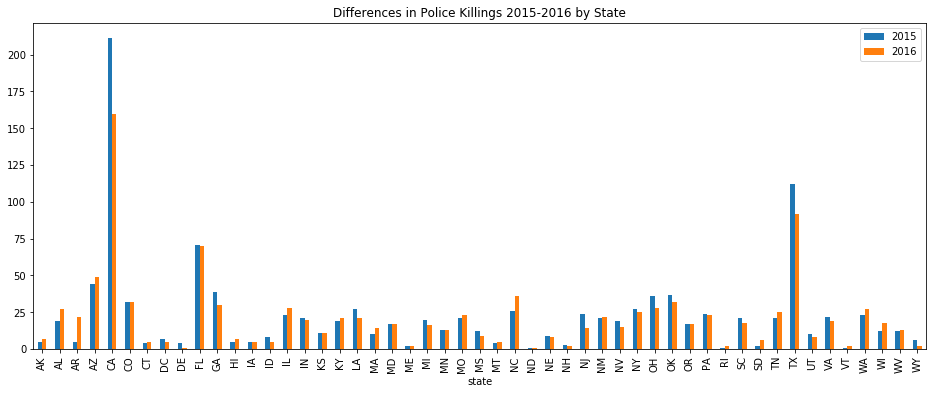

In [18]:
year_data.plot.bar(x=['state'], y=['2015','2016'], figsize=(16,6), title=("Differences in Police Killings 2015-2016 by State"))

Recall that 2015 saw 1146 deaths while 2016 saw 1080. From this figure we can see that a large portion of that decrease comes from California and Texas which both saw significant drops. This would lead one to believe that a notable change occurred in those states between those two years. It is also interesting that Arizona experienced such a spike in deaths between 2015 and 2016.

  ## A common criticism of police killings is that minorities are disproportionately targeted and have a higher chance of being killed while unarmed. Let's see if the data proves this to be true or false.

In [19]:
race_count = data['raceethnicity'].value_counts()

In [20]:
race_count

White                     1150
Black                      568
Hispanic/Latino            378
Asian/Pacific Islander      45
Unknown                     43
Native American             34
Arab-American                7
Other                        1
Name: raceethnicity, dtype: int64

In [21]:
# We can see that white people are the most common corpses. However, this is to be expected as white people are the majority.
# Let's examine this through a pie chart

In [22]:
#lets drop the unknown and other categories
race_count = race_count.drop(race_count.index[[4,7]])

In [59]:
labels = race_count.index
sizes = race_count.values

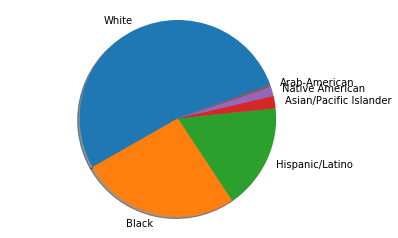

In [60]:
plt.pie(sizes, labels=labels, shadow=True, startangle=20)
plt.axis('equal')
plt.show()

Note that the chart is dominated by Whites, Blacks, and Latinos. Lets compare this to US demographics

In [25]:
races = ['White', 'Black', 'Hispanic/Latino', 'Asian/Pacific Islander', 'Native American', 'Arab-American']
values = [63.7, 12.2, 16.3, 4.9, 0.7, 0.5]
us_demo = pd.Series(values)
us_demo.index = races

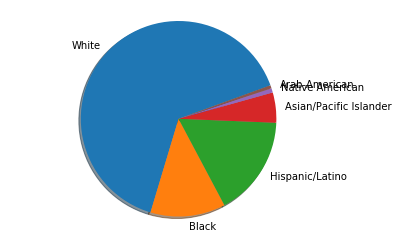

In [26]:
labels = us_demo.index
sizes = us_demo.values
plt.pie(sizes, labels=labels, shadow=True, startangle=20)
plt.axis('equal')
plt.show()

By comparing these two pie charts, we can see if the demographics of the US match the demographics of those killed by police in 2015 and 2016. We see that Black Americans have a much higher rate of being killed by police compared to other races. Whites and Asians seem to have a much lower rate of being killed by police.

In [27]:
not_armed = data['armed'] == 'No'
data['isarmed'] = 1
data['isarmed'][not_armed] = 0 
data.head()

C:\Users\Me\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency,isarmed
0,2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.066691,-81.167881,Death in custody,Chatham County Sheriff's Office,0
1,4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.487473,-122.891698,Gunshot,Washington County Sheriff's Office,1
2,5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.933347,-159.641972,Struck by vehicle,Kauai Police Department,0
3,6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.693797,-97.280549,Gunshot,Wichita Police Department,0
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.246534,-123.119497,Gunshot,Mason County Sheriff's Office,1


In [28]:
ptable = data.pivot_table(index='raceethnicity', values='isarmed', aggfunc=np.mean)

In [29]:
ptable = ptable.drop(ptable.index[[5,6]])

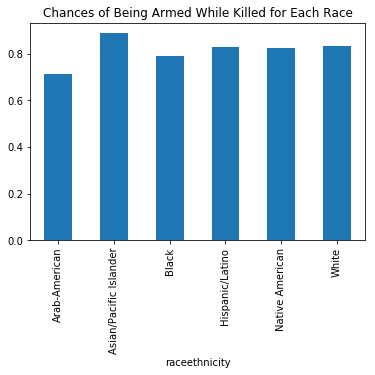

In [30]:
ptable.plot(kind='bar', figsize=(6,4), title=('Chances of Being Armed While Killed for Each Race'))

In [31]:
print(ptable)

raceethnicity
Arab-American             0.714286
Asian/Pacific Islander    0.888889
Black                     0.790493
Hispanic/Latino           0.828042
Native American           0.823529
White                     0.834783
Name: isarmed, dtype: float64


This is very interesting. It seems that Arab-Americans are the most likely to be killed by police officers while unarmed. Only 71.4% of Arab-Americans were armed when killed by police. Contrast this to Asian-Americans of which 88.9% were armed when killed by police. Blacks are surprisingly high at a 79% rate while Whites, Native Americans, and Hispanic/Latinos are near each other around the 82.8% mark. It's important to recall that the sample sizes for both Asian-Americans and Arab-Americans are very small.

## Let's examine the most common cause of death by police

In [32]:
data.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency,isarmed
0,2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.066691,-81.167881,Death in custody,Chatham County Sheriff's Office,0
1,4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.487473,-122.891698,Gunshot,Washington County Sheriff's Office,1
2,5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.933347,-159.641972,Struck by vehicle,Kauai Police Department,0
3,6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.693797,-97.280549,Gunshot,Wichita Police Department,0
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.246534,-123.119497,Gunshot,Mason County Sheriff's Office,1


In [33]:
data['classification'].value_counts()

Gunshot              2021
Death in custody       82
Taser                  72
Struck by vehicle      49
Other                   2
Name: classification, dtype: int64

In [34]:
is_armed = data['isarmed'] == 1
is_unarmed = data['isarmed'] == 0

In [35]:
armed = data[is_armed]
unarmed = data[is_unarmed]

In [36]:
armed['classification'].value_counts()

Gunshot              1814
Death in custody       10
Taser                   8
Struck by vehicle       4
Other                   1
Name: classification, dtype: int64

In [37]:
unarmed['classification'].value_counts()

Gunshot              207
Death in custody      72
Taser                 64
Struck by vehicle     45
Other                  1
Name: classification, dtype: int64

In [38]:
cause_of_death = pd.DataFrame()

In [39]:
cause_of_death = cause_of_death.append(armed['classification'].value_counts())

In [40]:
cause_of_death = cause_of_death.append(unarmed['classification'].value_counts())

In [41]:
cause_of_death.head()

,Death in custody,Gunshot,Other,Struck by vehicle,Taser
classification,10.0,1814.0,1.0,4.0,8.0
classification,72.0,207.0,1.0,45.0,64.0


In [42]:
cause_of_death.index = ['armed', 'unarmed']

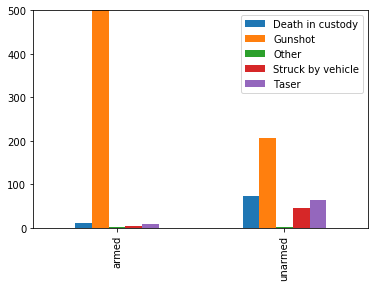

In [43]:
cause_of_death.plot.bar(ylim=(0,500))

Note* The y limit has been set to 500 to allow easier viewing of the figures. Remember that armed victims died to gunshots 1814 times.*
We can see that armed suspects are far more likely to die from gunshot wounds than anything else. This is not surprising.
We can also see that unarmed suspects are far more likely to die from other sources. Also not surprising.

## What was the most common armament for suspects killed by police?

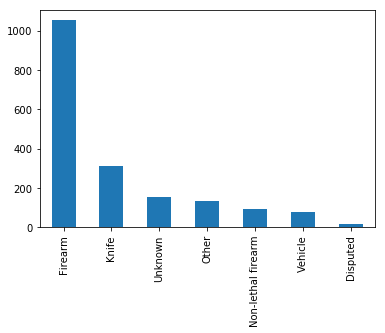

In [44]:
armed['armed'].value_counts().plot.bar()

## Let's see the locations of each death on a map of the US

In [45]:
from mpl_toolkits.basemap import Basemap

C:\Users\Me\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Me\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
C:\Users\Me\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Me\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


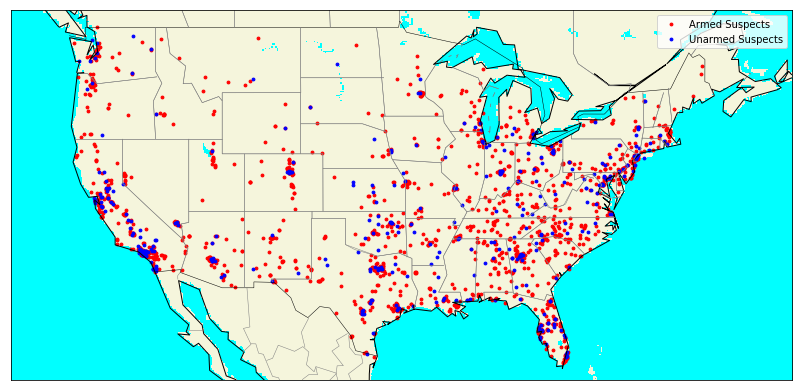

In [46]:
a_longitudes = armed['longitude'].tolist()
a_latitudes = armed['latitude'].tolist()
u_longitudes = unarmed['longitude'].tolist()
u_latitudes = unarmed['latitude'].tolist()

plt.figure(figsize=(14,10))
m = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=50, llcrnrlon=-130, urcrnrlon=-60)

xa, ya = m(a_longitudes, a_latitudes)
xu, yu = m(u_longitudes, u_latitudes)
m.scatter(xa,ya,s=8,color='red', label='Armed Suspects')
m.scatter(xu,yu,s=8,color='blue', label='Unarmed Suspects')
m.drawcoastlines()
m.drawcountries()
m.drawlsmask(land_color='beige',ocean_color='aqua',lakes=True)
m.drawstates(color='gray')
plt.legend()

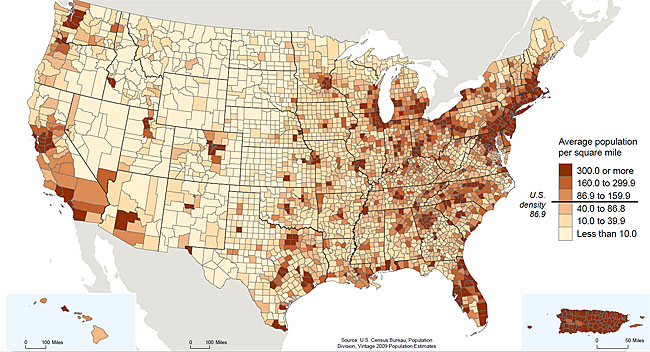

In [47]:
from IPython.display import Image 
Image(filename='USA-population-density.jpg')

By comparing the above two images, we can see that the number of police killings seems to correspond to population density. However, it seems that New Mexico, Arizona, and Western Texas have an unusually high rate for their population density.

## When are these deaths most likely to occur?

In [48]:
from datetime import datetime

In [49]:
data['date'] = data['year'].astype(str) + ' ' + data['month'] + ' ' + data['day'].astype(str)

In [50]:
def makedate(strdate):
    dt = datetime.strptime(strdate, '%Y %B %d')
    return dt

In [51]:
data['date'] = data['date'].apply(makedate)

In [52]:
killmonths = data.groupby('month')['uid'].agg(len)

In [53]:
killmonths

month
April        186
August       196
December     175
February     183
January      178
July         211
June         178
March        213
May          172
November     178
October      176
September    180
Name: uid, dtype: int64

In [54]:
killmonths.index = pd.CategoricalIndex(killmonths.index, 
                               categories=['January',
                                           'February',
                                           'March',
                                           'April',
                                           'May',
                                           'June',
                                           'July',
                                           'August',
                                           'September', 
                                           'October', 
                                           'November', 
                                           'December'], 
                               sorted=True)
killmonths = killmonths.sort_index()

In [55]:
killmonths

month
January      178
February     183
March        213
April        186
May          172
June         178
July         211
August       196
September    180
October      176
November     178
December     175
Name: uid, dtype: int64

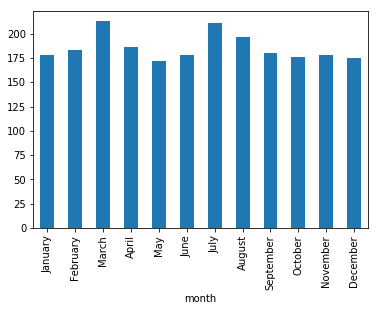

In [56]:
killmonths.plot.bar()

We can see the most deaths occur in the months of March and July. It is commonly known that crime rates rise during the summer months, so it would make sense that the winter months are low. What is surprising is how low the months of May and June are.